## 12.1. 들어가며

학습목표
 - 파이썬에서 텍스트 데이터를 어떻게 처리하는지
 - 파이썬에서 텍스트파일과 디렉토리에 접근하는 방법
 - 텍스트 파일의 종류와 다루는 방법

목차
 - 텍스트와 인코딩 (인코딩, 디코딩, 문자열, 정규표현식)
 - 파일과 디렉터리 (파일, 디렉터리, 모듈, 패키지)
 - 여러가지 파일 포맷 다루기 (csv, xml, json)

## 12.2. 텍스트 데이터를 문자열로 저장한다는 것 (1) 인코딩과 디코딩

<div>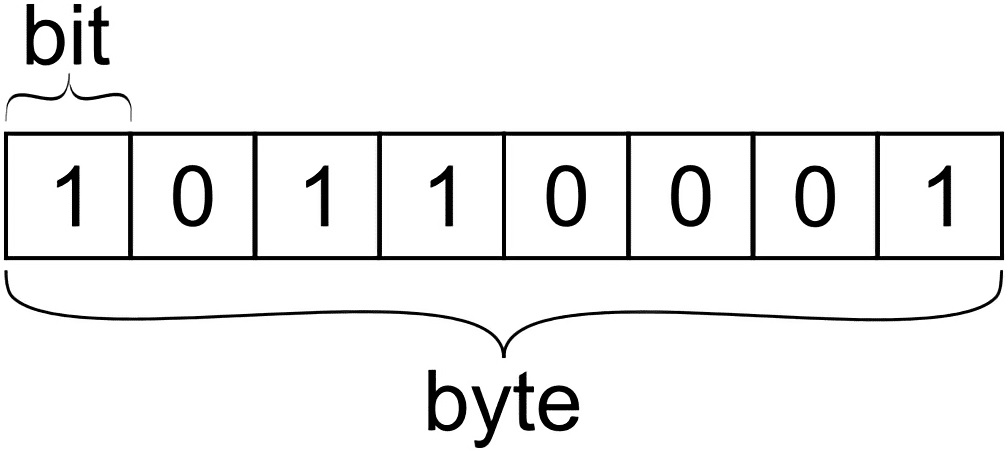</div>

Unicode Transformation Format

[유니코드와 UTF-8](https://jeongdowon.medium.com/unicode%EC%99%80-utf-8-%EA%B0%84%EB%8B%A8%ED%9E%88-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0-b6aa3f7edf96)
 - Unicode
    - 국제적으로, 전세계 언어를 모두 표시할 수 있는 표준 코드(1987 ~ )
    - 참고로, [ASCII](https://ko.wikipedia.org/wiki/ASCII)는 영문 알파벳을 사용하는 대표적인 인코딩 방식이다. (1960 ~ )
    - 한글 '가'는 유니코드로 'U+AC00'이다.
    ([이 표](https://ko.wikipedia.org/wiki/%EC%9C%A0%EB%8B%88%EC%BD%94%EB%93%9C_A000~AFFF)<font color = grey>
    에는 16진법으로 4자리수가 있다.
    즉, $16^4=2^{16}$개의 문자가 있다.
    이것이 byte(=$2^8$)와 어떤 관련이 있는지는 모르겠다.
    byte로 환산하면 2byte인데..)</font>
    
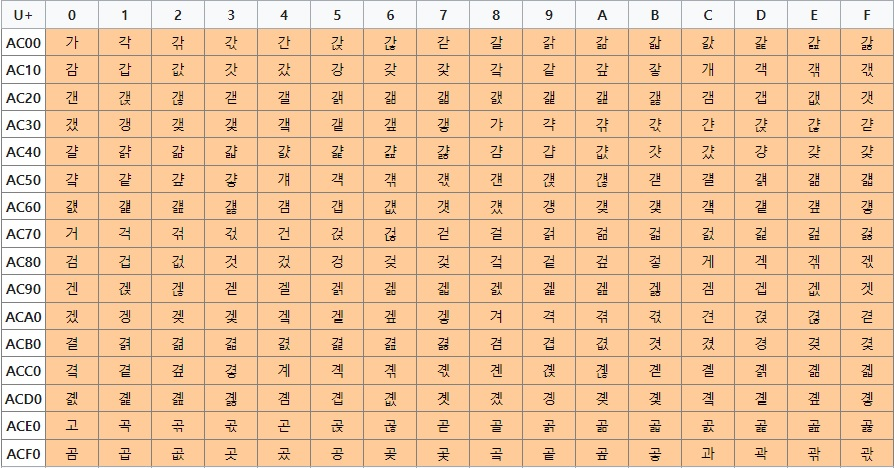
 - UTF - 8
     > UTF-8는 유니코드를 인코딩하는 방식이다. 전세계적인 약속이다.
     - UTF-8은 가변 인코딩 방식이다. 글자마다 byte 길이가 다르다. 'a'는 1byte이고, '가'는 3byte이다.
     - 이 단위(글자 마다의 byte 길이)는 첫 byte에 표현된다.
     단위가 1byte이면 0으로 시작하고, 단위가 2byte면 110으로 시작하고, 단위가 3byte면 1110으로 시작한다
         - 단위가 1byte : 첫 비트는 0이고 나머지 일곱 비트로 문자를 표현한다.
         - 단위가 2byte : 첫 바이트의 첫 세 비트가 110이고, 두번째 바이트의 첫 두 비트가 10이다, 나머지 11비트로 문자를 표현한다.
         - 단위가 3byte : 첫 바이트의 첫 네 비트가 1110이고, 두번째와 세번째 바이트의 첫 두비트가 10이다. 나머지 16비트로 문자를 표현한다.
     ![](https://i.imgur.com/AmlOLHz.jpeg)

[UTF-8, UTF-16 차이](https://pickykang.tistory.com/13)

이 블로그 내용에서 UTP-8의 내용만을 적었다.

|byte수|이진수                                 |경우의 수|UTF-8           |경우의 수(지수)|
|:-:   |:-                                     |:-:      |:-:             |:-:|
|1byte |0xxx xxxx                              |$2^7$    |U+0000~U+007F   |4+3|
|2byte |110x xxxx 10xx xxxx                    |$2^{11}$ |U+0080~U+07FF   |4+4+3|
|3byte |1110 xxxx 10xx xxxx 10xx xxxx          |$2^{16}$ |U+0800~U+FFFF   |4+4+4+4|
|4byte |1111 0xxx 10xx xxxx 10xx xxxx 10xx xxxx|$2^{21}$ |U+10000~U+10FFFF|4+4+4+4+4+1|

위의 표를 읽어보자.
UTF-8로 적혀있는 것을 이진수로 변환해보자.

유니코드로 U+0010으로 적힌 것은, [이 곳](https://ko.wikipedia.org/wiki/%EC%9C%A0%EB%8B%88%EC%BD%94%EB%93%9C_0000~0FFF)에 따르면 'DLE'라는 문자인데, 16진법으로 $10_{(16)}$이라는 뜻이다.
즉, 이진법으로 $1000_{(2)}$이고, 이것을 0000 1000으로 표시한다.
따라서 문자 'DLE'는 1바이트를 차지하는 문자이다.

유니코드로 U+0101로 적힌 것은, 같은 곳 출처를 따르면 "Ā"라는 문자(로마자 확장 A)인데, 16진법으로 $101_{(16)}$이라는 뜻이다.
즉, 이진법으로 $16^2+1=257=100000001_{(2)}$이다.
이것을 110x xxxx 10xx xxxx 표현에 맞추기 위해 0 0100 00 0001으로 쓰면 "1100 0100 1000 0001"이 최종적인 이진수 표현이다.
따라서 문자 'Ā'는 2바이트를 차지하는 문자이다.

|1|1|0|x| |x|x|x|x| |1|0|x|x| |x|x|x|x|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|1|1|0|0| |0|1|0|0| |1|0|0|0| |0|0|0|1|

유니코드로  U+AE40으로 적힌 것은, [이 곳](https://ko.wikipedia.org/wiki/%EC%9C%A0%EB%8B%88%EC%BD%94%EB%93%9C_A000~AFFF)에 따르면 '김'이라는 문자인데, 16진법으로 $AE40_{(16)}$이라는 뜻이다.
즉 이진법으로 계산하면
\begin{align*}
AE40_{(16)}
&= 10\times16^3+14\times16^2+4\times16\\
&=1010_{(2)}\times16^3+1110_{(2)}\times16^2+0100_{(2)}\times16\\
&=1010 1110 0100 0000_{(2)}
\end{align*}
이다.
이것을 1110 xxxx 10xx xxxx 10xx xxxx 표현에 맞추기 위해
1010 11 1001 00 0000으로 쓰면 "1110 1010 1011 1001 1000 0000"이 최종적인 이진수 표현이다.
따라서 문자 '김'은 2바이트를 차지하는 문자이다.

|1|1|1|0| |x|x|x|x| |1|0|x|x| |x|x|x|x| |1|0|x|x| |x|x|x|x|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|1|1|1|0| |1|0|1|0| |1|0|1|1| |1|0|0|1| |1|0|0|0| |0|0|0|0|

In [1]:
print(ord('a'))    
print(ord('A'))
print(chr(97))
print(ord('가'))
print(chr(0xAC00))   
#- 0xAC00은 44032의 16진수 표현입니다.

97
65
a
44032
가


위의 계산을 해보자.
한글의 '가'는 유니코드 상에서 AC00이다.
이것은 16진수로서
\begin{align*}
AC00_{(16)}
&=10\times16^3+12\times16^2
&&=40960+3072=44032\\
&=1010_{(2)}\times16^3+1100_{(2)}\times16^2
&&=1010110000000000_{(2)}\\
\end{align*}
이다.
[이 곳](https://blockdmask.tistory.com/478)에 따르면 16진법을 쓸 때는 `0x`를 맨 앞에 쓴다고 한다. (2진법으로 쓸 때는 `0b`를 맨 앞에 쓰고, 8진법으로 쓸 때는 `0`을 맨 앞에 써준다고 한다.)

In [2]:
#- 파이썬 3-#
#- bytes와 string으로 구분됩니다.

str1 = b'hello'
str2 = 'hello'
str3 = u'hello'
print(type(str1), type(str2), type(str3))
# 결과 : <class 'bytes'>,  <class 'str'>,  <class 'str'>

<class 'bytes'> <class 'str'> <class 'str'>


 - 파이썬2 : 문자열 → 아스키 → 유니코드
 - 파이썬3 : 문자열 → 유니코드

## 12.3. 텍스트 데이터를 문자열로 저장한다는 것 (2) 문자열 다루기

### 이스케이프 문자
escape string

In [3]:
s = 'I don\'t like Python!'
print(s)

I don't like Python!


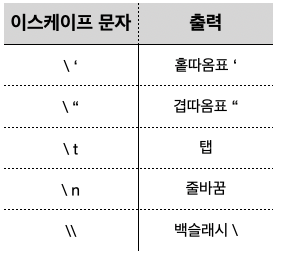
<!-- 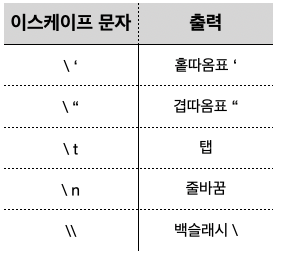 -->

In [4]:
#- 줄 바꿈
print("사회적\n거리두기")
print('--------------------------')

#- 탭(tab)
print("사회적\t거리두기")
print('--------------------------')

#- 작은따옴표 포함
print('오늘부터 \'사회적 거리두기\'')

사회적
거리두기
--------------------------
사회적	거리두기
--------------------------
오늘부터 '사회적 거리두기'


### 원시 문자열
raw string

In [5]:
#- 예제 코드2
print('Please don\'t touch it')
print(r'Please don\'t touch it')

Please don't touch it
Please don\'t touch it


### startswith, endswith

In [6]:
EmployeeID = ['OB94382', 'OW34723', 'OB32308', 'OB83461', 
                                  'OB74830', 'OW37402', 'OW11235', 'OB82345'] 
Production_Employee = [P for P in EmployeeID if P.startswith('OB')]   # 'OB'로 시작하는 직원 ID를 다 찾아봅니다
Production_Employee

['OB94382', 'OB32308', 'OB83461', 'OB74830', 'OB82345']

### 공백 문자 처리 : trimming
이스케이프 문자와 중복된다.
 - space bar : 한 칸 띄어쓰기
 - 탭 : 네 칸 띄어쓰기 `\t`
 - 줄 바꿈 (new line)
 - 개행 (line feed) : `\n` 
 - 캐리지 리턴 (carriage return, 복귀) : `\r`
 
줄바꿈과 개행이 서로 같은 말인지 궁금하다.

In [7]:
print("사회적 거리두기")
print('--------------------------')
print("사회적\t거리두기")
print('--------------------------')
print("사회적\n거리두기")
print('--------------------------')
print("사회적\r거리두기")

사회적 거리두기
--------------------------
사회적	거리두기
--------------------------
사회적
거리두기
--------------------------
거리두기


### 대소문자 관련

In [8]:
#- 모든 문자를 대문자로 변환 : upper()
txt = "I fell into AIFFEL"
txt.upper()

'I FELL INTO AIFFEL'

In [9]:
#- 모든 문자를 소문자로 변환 : lower()
txt.lower()

'i fell into aiffel'

In [10]:
#- 첫 글자만 대문자로 변환 : capitalize()
txt.capitalize()

'I fell into aiffel'

### isX

In [11]:
print("aiffel".isupper())
print("aiffel".islower())
print("PYTHON".istitle())
print("python101".isalpha())
print("python101".isalnum())
print("101".isdecimal())

False
True
False
False
True
True


### join()과 split()

In [12]:
#- join()
stages = ['fundamentals', 'exploration', 'goingdeeper']
",".join(stages)

'fundamentals,exploration,goingdeeper'

In [13]:
# 큰따옴표 안에 다양한 구분자(빈칸, 언더바, 온점 등)를 넣어 보세요.
" ".join(stages)

'fundamentals exploration goingdeeper'

In [14]:
#- join()
stages = ['fundamentals', 'exploration', 'goingdeeper']
" , ".join(stages)

'fundamentals , exploration , goingdeeper'

In [15]:
#- split()
'fundamentals,exploration,goingdeeper'.split(',')

['fundamentals', 'exploration', 'goingdeeper']

### replace()

In [16]:
sent = 'I can do it!'
sent.replace('I', 'You')

'You can do it!'

### 불변(immutable)의 문자열

단지, 지금까지 배운 것으로만 분류해본 표.
(`frozen set`은 어디?)

|         |숫자                     |iterable            |
|:-:      |:-:                      |:-:                 |
|mutable  |                         |`list`,`set`,`dict` |
|immutable|`int`, `float`, `complex`|`bool`,`str`,`tuple`|

> Q2. 두 번째 코드 블록에서 두 개의 id(sent) 값이 다른 이유는 무엇인가요?



In [17]:
sent = 'I fell into AIFFEL'
print(sent)
print(id(sent))
sent.upper()
print(sent)
print(id(sent))

I fell into AIFFEL
139699518891952
I fell into AIFFEL
139699518891952


In [18]:
sent = 'I fell into AIFFEL'
print(sent)
print(id(sent))
sent.upper()
print(sent.upper())
print(id(sent.upper()))

I fell into AIFFEL
139699518893152
I FELL INTO AIFFEL
139699518867856


## 12.4. 텍스트 데이터를 문자열로 저장한다는 것 (3) 정규 표현식

### 문자열 vs 정규표현식

In [19]:
sent = 'I can do it!'
rep = sent.replace("I", "You")
rep

'You can do it!'

In [20]:
import re
sent = 'I can do it!'
pattern = re.sub("I", "You", sent)
pattern

'You can do it!'

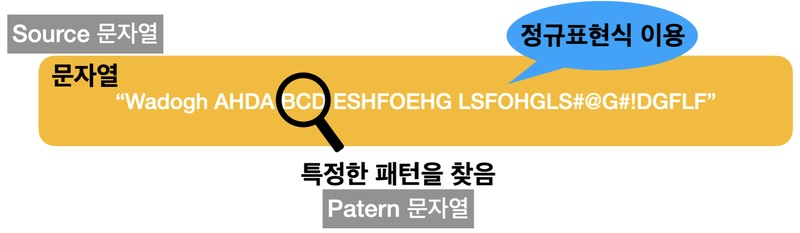

### 정규표현식 시작하기!

regex : regular expression
- 모듈 `re`를 import한다.
 - 두 단계
     - 찾고자 하는 문자열의 패턴을 정의하고 (컴파일)
     - 정의된 패턴과 매칭되는 경우를 찾아 다양한 처리를 한다.

In [21]:
#1단계 :  "the"라는 패턴을 컴파일한 후 패턴 객체를 리턴합니다. 
pattern = re.compile("the")    

# 2단계 : 컴파일된 패턴 객체를 활용하여 다른 텍스트에서 검색을 수행합니다.
pattern.findall('of the people, for the people, by the people')

['the', 'the', 'the']

In [22]:
re.findall('the', 'of the people, for the people, by the people')

['the', 'the', 'the']

### 메서드

 - `search()` : 일치하는 패턴 찾기 ()
 - `match()` : 일치하는 패턴 찾기 ()
 - `findall()` : 일치하는 모든 패턴 찾기 (모든 일치 패턴을 리스트에 담아서 반환)
 - `split()`
 - `sub()`

In [23]:
src = "calculus and linear algebra"
search = re.search("al", src)
bool(search)

True

In [24]:
search.group()

'al'

In [25]:
src = "calculus and linear algebra"
match = re.match("al", src)
# match = re.match("cal", src)
bool(match)

False

In [26]:
match

In [27]:
# match.group()

### 패턴 : 특수문자, 메타문자

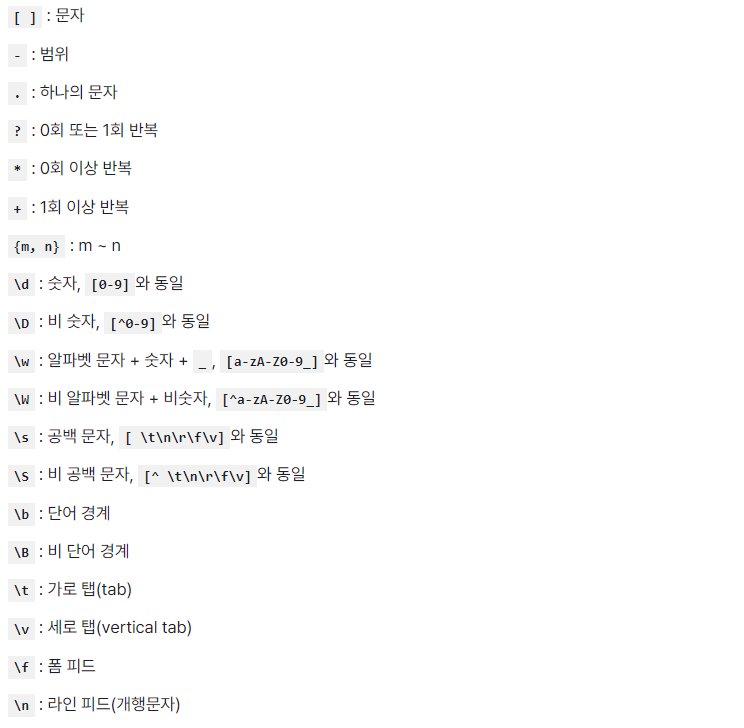

### 예제

In [28]:
#- 연도(숫자)
text = """
The first season of America Premiere League  was played in 1993. 
The second season was played in 1995 in South Africa. 
Last season was played in 2019 and won by Chennai Super Kings (CSK).
CSK won the title in 2000 and 2002 as well.
Mumbai Indians (MI) has also won the title 3 times in 2013, 2015 and 2017.
"""
pattern = re.compile("[1-2]\d\d\d")
pattern.findall(text)

['1993', '1995', '2019', '2000', '2002', '2013', '2015', '2017']

In [29]:
#- 전화번호(숫자, 기호)
phonenumber = re.compile(r'\d\d\d-\d\d\d-\d\d\d\d')
phone = phonenumber.search('This is my phone number 010-111-1111')
if phone:
  print(phone.group())
print('------')
phone = phonenumber.match ('This is my phone number 010-111-1111')
if phone:
  print(phone.group())

010-111-1111
------


In [30]:
#- 전화번호(숫자, 기호)
phonenumber = re.compile(r'\d{3}-\d{3}-\d{4}')
phone = phonenumber.search('This is my phone number 010-111-1111')
if phone:
  print(phone.group())
print('------')
phone = phonenumber.match ('This is my phone number 010-111-1111')
if phone:
  print(phone.group())

010-111-1111
------


In [31]:
#- 이메일(알파벳, 숫자, 기호)
text = "My e-mail adress is doingharu@aiffel.com, and tomorrow@aiffel.com"
pattern = re.compile("[0-9a-zA-Z]+@[0-9a-z]+\.[0-9a-z]+")
pattern.findall(text)

['doingharu@aiffel.com', 'tomorrow@aiffel.com']

### 구현순서

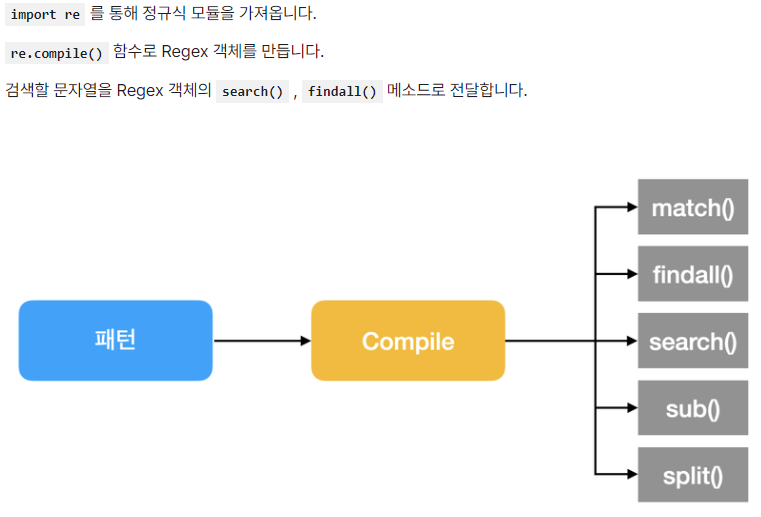

## 12.5. 파일과 디렉터리 (1) 파일

In [32]:
f = open("hello.txt","w") 
#- open(파일명, 파일모드)
#- 파일을 열고 파일 객체를 반환합니다. 
for i in range(10):
    f.write("안녕")
    #- write() 메서드로 '안녕'을 10번 씁니다.
f.close()
#- 작업이 끝나면 close() 메서드로 닫아줍니다. *필수!

print("완료!")

완료!


<font color = red> 상대경로로 이 파일이 속한 폴더에 `12`라는 폴더를 만들어 거기에 "hello.txt"를 저장시키고 싶은데 어떻게 해야 할 지 모르겠다.</font>

In [33]:
with open("hello.txt", "r") as f:
  print(f.read())

안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕


In [34]:
quotes = ["\n안녕하세요.\n", "반갑습니다.\n", "오랫만입니다.\n"]

with open("hello.txt", "a") as f:              # 위에서 만든 파일에 이어서 씁니다. 
    f.writelines(quotes)

In [35]:
with open("hello.txt", "r") as f:
  print(f.read())

안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕
안녕하세요.
반갑습니다.
오랫만입니다.



## 12.6. 파일과 디렉터리 (2) 디렉터리

https://www.youtube.com/watch?v=hZ6j_g_O3Ts

## 12.7. 파일과 디렉터리 (3) 모듈과 패키지

In [36]:
#- 현재 실행되고 있는 파이썬 실행 파일의 디렉터리를 반환합니다.
import sys
sys.executable

'/opt/conda/bin/python'

In [37]:
#- 임포트할 때 불러 오는 모듈들이 위치한 경로입니다.
sys.path

['/aiffel/aiffel/govin08/001_LMS_fundamental_SO3',
 '/aiffel/storage/package',
 '/opt/conda/lib/python39.zip',
 '/opt/conda/lib/python3.9',
 '/opt/conda/lib/python3.9/lib-dynload',
 '',
 '/opt/conda/lib/python3.9/site-packages',
 '/opt/conda/lib/python3.9/site-packages/IPython/extensions',
 '/aiffel/.ipython']

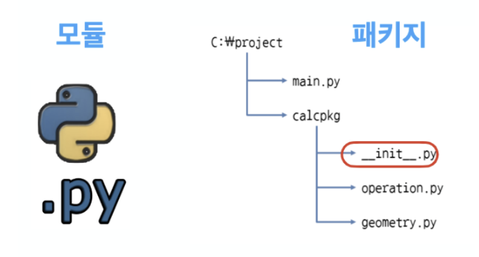

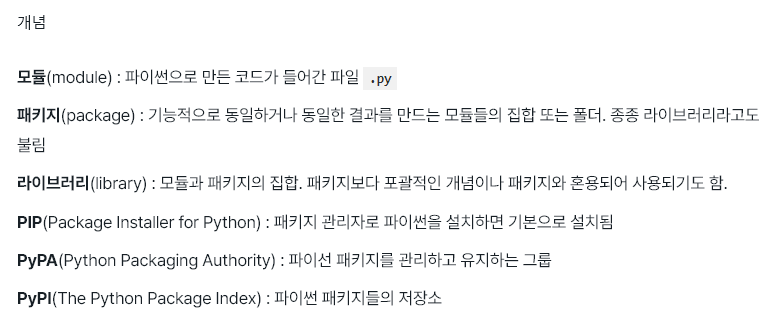

## 12.8. 여러가지 파일 포맷 다루기 (1) CSV 파일

### CSV

comma separated value

In [38]:
billboardchart = {
  				 1 : ["Tho Box","Roddy Ricch","2019-12-19"],
                 2 : ["Don't Start Now", "Dua Lipa", "2019-11-01"],
                 3 : ["Life Is Good", "Future Featuring Drake", "2020-02-10"],
                 4 : ["Blinding", "The Weeknd", "2019-11-29"],
                 5 : ["Circles", "Post Malone","2019-08-30"]}

with open("billboardchart.csv","w") as f:
    for i in billboardchart.values():
        data = ",".join(i)
        f.write(data+"\n")

print("슝~")

슝~


In [39]:
import csv

header = ["title", "singer", "released date"]

with open("billboardchart.csv","r") as inputfile:
    with open("billboardchart_out.csv","w", newline='\n') as outputfile:
        fi = csv.reader(inputfile, delimiter=',')
        fo = csv.writer(outputfile, delimiter=',')
        fo.writerow(header)
        for row in fi:
            fo.writerow(row)

print("슝~")

슝~


### CSV와 pandas

In [40]:
#- 1. 데이터를 준비합니다.
fields = ["title", "singer", "released date"]
rows = [ ["Tho Box","Roddy Ricch","2019-12-19"],
               ["Don't Start Now", "Dua Lipa", "2019-11-01"],
               ["Life Is Good", "Future Featuring Drake", "2020-02-10"],
               ["Blinding", "The Weeknd", "2019-11-29"],
               ["Circles", "Post Malone","2019-08-30"]]

print("슝~")

슝~


In [41]:
#- 2. 판다스를 이용해 데이터를 csv 파일로 저장합니다.
import pandas as pd

df=pd.DataFrame(rows, columns=fields)
df.to_csv('pandas.csv',index=False)

print("슝~")

슝~


In [42]:
#- 3. 동일한 내용을 csv.writer를 이용해 수행해 봅니다.
import csv 

filename = "test.csv"
with open(filename, 'w+', newline='\n') as csv_file: 
    csv_writer = csv.writer(csv_file) 
    csv_writer.writerow(fields) 
    csv_writer.writerows(rows)

print("완료")

#- test.csv 파일을 직접 열어서 눈으로 살펴 보세요. -#

완료


In [43]:
df = pd.read_csv('pandas.csv')
df.head()

,title,singer,released date
0,Tho Box,Roddy Ricch,2019-12-19
1,Don't Start Now,Dua Lipa,2019-11-01
2,Life Is Good,Future Featuring Drake,2020-02-10
3,Blinding,The Weeknd,2019-11-29
4,Circles,Post Malone,2019-08-30


## 12.9. 여러가지 파일 포맷 다루기 (2) XML 파일

### XML

#### XML은 extensible markup language의 약자로, 다목적 마크업 언어입니다.

```
<Person>
    <Name>이펠</Name>
    <Age>28</Age>
    <Place>강남</Place>
</Person>

#- 꺾쇠 괄호 안에 태그 이름을 정의하고, 태그 사이에 데이터를 기록하는 형식입니다.
#- 참고로, 태그 이름은 사용자가 마음대로 지정할 수 있습니다.

```

#### WHO athena API GHO

```
<?xml version="1.0" encoding="utf-8"?>
#- XML의 버전과 인코딩을 명시하는 태그입니다. *필수!
<Workbook xmlns="urn:schemas-microsoft-com:office:spreadsheet"
          xmlns:o="urn:schemas-microsoft-com:office"
          xmlns:x="urn:schemas-microsoft-com:excel"
          xmlns:ss="urn:schemas-microsoft-com:spreadsheet"
          xmlns:html="http://www.w3.org/TR/REC-html40">
   <DocumentProperties/>
   <Styles>
      <Style ss:ID="Hyperlink" ss:Name="Hyperlink">
         <Font ss:Color="#0000FF" ss:Underline="Single"/>
      </Style>
      <Style ss:ID="header">
         <Alignment ss:Vertical="Bottom" ss:WrapText="1"/>
         <NumberFormat ss:Format="@"/>
      </Style>
   </Styles>
   <Worksheet ss:Name="notice">
      <Table>
         <Row>
            <Cell>
               <Data ss:Type="String">Notice</Data>
            </Cell>
         </Row>
         <Row/>
         <Row>
            <Cell>
               <Data ss:Type="String">Date generated</Data>
            </Cell>
         </Row>
```

태그, 요소, 속성
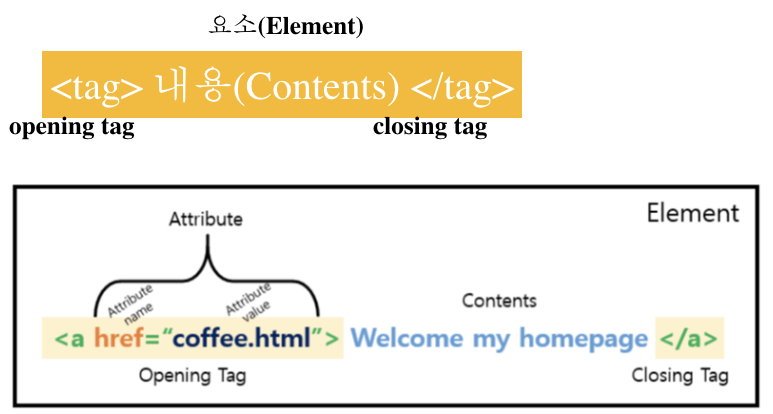

XML은 다목적 마크업 언어(Extensible Markup Language)이다.

마크업 언어는 **태그**(tag)로 이루어진 언어를 말하며, 상위(부모) 태그 - 하위(자식) 태그의 계층적 구조로 되어 있다.

XML은 **요소**(element)들로 이루어져 있다.

요소는 <열린 태그> 내용 </닫힌 태그>가 기본적인 구조이며, **속성**(attribute) 값을 가질 수도 있다.

### XML 파일 만들기

In [44]:
import xml.etree.ElementTree as ET

person = ET.Element("Person")
name = ET.Element("name")
name.text = "이펠"
person.append(name)

age = ET.Element("age")
age.text = "28"
person.append(age)

ET.SubElement(person, 'place').text = '강남'

ET.dump(person)

<Person><name>이펠</name><age>28</age><place>강남</place></Person>


In [45]:
person

<Element 'Person' at 0x7f0e1cad8950>

In [46]:
type(person)

xml.etree.ElementTree.Element

In [47]:
person.attrib["id"] = "0x0001"
name.tag = "firstname"
ET.dump(person)

<Person id="0x0001"><firstname>이펠</firstname><age>28</age><place>강남</place></Person>


 - `attrib` 메서드를 통해 `Person`의 새로운 속성(attribute)을 추가한다.
 - `tag` 메서드를 통해 `name`이었던 태그를 `firstname`으로 바꾸었다.

In [48]:
lastname = ET.Element('lastname', date='2020-03-20')
lastname.text = '아'
person.insert(1,lastname)
ET.dump(person)

<Person id="0x0001"><firstname>이펠</firstname><lastname date="2020-03-20">아</lastname><age>28</age><place>강남</place></Person>


 - `lastname`이라는 태그를 새로 만들었다.
 - `insert` 메서드를 통해 `lastname`이라는 태그를 `person` 아래로 넣었다.

In [49]:
person.remove(age)
ET.dump(person)

<Person id="0x0001"><firstname>이펠</firstname><lastname date="2020-03-20">아</lastname><place>강남</place></Person>


In [50]:
ET.ElementTree(person).write('person.xml')

In [51]:
!ls

'01. Ready to go.ipynb'
'02. 인공지능 개발자가 되기 위한 위대한 첫걸음.ipynb'
'03. 터미널로 배우는 리눅스 운영체제.ipynb'
'04. 개발자를 위한 첫 번째 필수교양.ipynb'
'05. 파이썬으로 코딩 시작하기.ipynb'
'06. 파이썬 잘하는 척 해보자.ipynb'
'07. 당신의 행운의 숫자는? 나만의 n면체 주사위 위젯 만들기.ipynb'
'08. Data 어떻게 표현하면 좋을까? 배열(array)과 표(table).ipynb'
'09. 데이터를 한눈에! Visualization.ipynb'
'10+. 연습문제.ipynb'
'10. 다양한 데이터 전처리 기법.ipynb'
'11. 사이킷런으로 구현해 보는 머신러닝.ipynb'
 12
'12. 텍스트의 다양한 변신 (문자열, 파일 다루기).ipynb'
 1-5
 3-10
 6-9
 barplot.png
 billboardchart.csv
 billboardchart_out.csv
 data
 hello.txt
 pandas.csv
 person.xml
 test.csv


### XML 파싱하기

파싱(parsing, 구문 분석)이란 어떤 문자열을 의미 있는 토큰(token)으로 분해해, 문법적 의미와 구조를 반영한 파스 트리(parse tree)를 만드는 과정입니다.
XML 문서를 파싱하게 되면 특정 태그명이나 속성값 등을 불러올 수 있습니다.

In [52]:
!mkdir -p ~/aiffel/ftext/data/

In [53]:
!ln -s ~/data/books.xml ~/aiffel/ftext/data

In [55]:
from bs4 import BeautifulSoup
import os

path = os.getenv("HOME") + "/aiffel/ftext/data/books.xml"  # 로컬을 사용하시려면 경로는 수정해 주세요. 
with open(path, "r", encoding='utf8') as f:
    booksxml = f.read() 
    #- 파일을 문자열로 읽기
 
soup = BeautifulSoup(booksxml,'lxml') 
#- BeautifulSoup 객체 생성 : lxml parser를 이용해 데이터 분석

for title in soup.find_all('title'): 
#-  태그를 찾는 find_all 함수 이용
    print(title.get_text())

XML Developer's Guide
Midnight Rain
Maeve Ascendant
Oberon's Legacy
The Sundered Grail
Lover Birds
Splish Splash
Creepy Crawlies
Paradox Lost
Microsoft .NET: The Programming Bible
MSXML3: A Comprehensive Guide
Visual Studio 7: A Comprehensive Guide


## 12.10. 여러가지 파일 포맷 다루기 (3) JSON 파일

### JSON
 - Javascript Object Notation
 - 웹 언어인 Javascript의 데이터 객체 표현 방식

```
person = {
      "first name" : "Yuna",
      "last name" : "Jung",
      "age" : 33,
      "nationality" : "South Korea",
      "education" : [{"degree":"B.S degree", "university":"Daehan university", "major": "mechanical engineering", "graduated year":2010}]
       }
       ```


In [56]:
import json

person = {
      "first name" : "Yuna",
      "last name" : "Jung",
      "age" : 33,
      "nationality" : "South Korea",
      "education" : [{"degree":"B.S degree", "university":"Daehan university", "major": "mechanical engineering", "graduated year":2010}]
       } 

with open("person.json", "w") as f:
    json.dump(person , f)

print("슝~")

슝~


In [57]:
import json

with open("person.json", "r", encoding="utf-8") as f:
    contents = json.load(f)
    print(contents["first name"])
    print(contents["education"])

Yuna
[{'degree': 'B.S degree', 'university': 'Daehan university', 'major': 'mechanical engineering', 'graduated year': 2010}]
